In [1]:
from matplotlib import pyplot as plt
import seaborn as sb
import numpy as np
from scipy.stats import uniform,norm,t,binom,expon,chi2,gamma,poisson,beta,dirichlet
from scipy.stats import multivariate_normal as multi_norm
from sklearn.linear_model import LinearRegression as Linear
from scipy.optimize import brentq
from scipy.special import perm,comb
import time
import pandas as pd

**10.3**

In [2]:
m=32
n=2*(m**2)
grid=np.meshgrid(np.linspace(0,1-1/m,m),np.linspace(0,1-1/m,m))
def f(S):
    x1=S[0]
    x2=S[1]
    return x1**2*np.exp(x1*x2)
    
def estimate_gs(rep):
    mu=np.zeros(rep)
    Var1=np.zeros(rep)
    Var2=np.zeros(rep)
    for i in range(rep):
        U1=uniform.rvs(size=n).reshape([2,m,m])/m
        S1=(grid+U1).reshape(2,-1)
        F1=f(S1)
        mu1=np.mean(F1)
        U2=uniform.rvs(size=n).reshape([2,m,m])/m
        S2=(grid+U2).reshape(2,-1)
        F2=f(S2)
        mu2=np.mean(F2)
        mu[i]=(mu1+mu2)/2
        Var1[i]=np.sum((F1-F2)**2)/(4*m**4)
        Var2[i]=(mu1-mu2)**2/4
        
    return mu,Var1,Var2

mu,Var1,Var2=estimate_gs(10000)

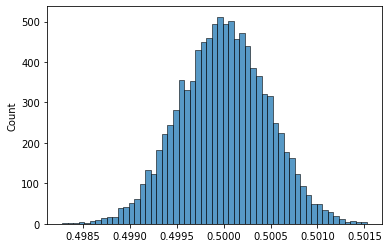

variance: 2.1815970576984332e-07


In [3]:
sb.histplot(mu)
plt.show()
print('variance:',np.var(mu))

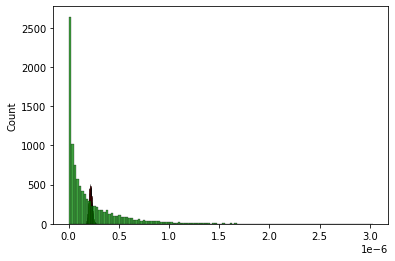

Var1: 2.158573811020662e-07 1.594235372313874e-08
Var2: 2.1320249633850902e-07 2.9704551194944685e-07
347.1691357564934


In [4]:
sb.histplot(Var1,color='r')
sb.histplot(Var2,color='g')
plt.show()
print('Var1:',np.mean(Var1),np.std(Var1))
print('Var2:',np.mean(Var2),np.std(Var2))
print(np.var(Var2)/np.var(Var1))

**10.4**

In [5]:
alpha=1/2
def f(X):
    J=np.arange(1,1001)*1.0
    g=1+(X**alpha/J**2).sum(axis=1)
    return 1/g

n=1000
X=uniform.rvs(size=n*1000).reshape([n,1000])
FX=f(X)
print(np.mean(FX),np.std(FX))

0.4843065282480627 0.0635477565583706


In [6]:
n=100
r=100
mu=np.zeros(r)
for i in range(r):
    X=np.zeros([n,1000])
    for d in range(1000):
        X[:,d]=(np.random.choice(np.arange(n),size=n,replace=False)+uniform.rvs(size=n))/n
    
    mu[i]=np.mean(f(X))
    
print(np.mean(mu),np.std(mu))

0.48435410977775717 0.0004087257330432826


**10.5**

In [7]:
def f(X):
    return (-1)**(X>0.5).sum(axis=1)

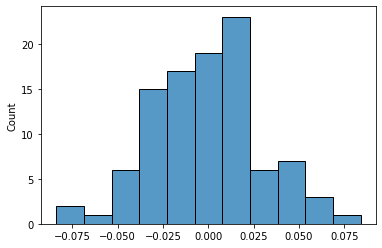

0.03162277660168379 0.03004154456748188


In [12]:
n=1000
r=100
mu=np.zeros(r)
for i in range(r):
    X=np.zeros([n,1000])
    for d in range(1000):
        X[:,d]=(np.random.choice(np.arange(n),size=n,replace=False)+uniform.rvs(size=n))/n
    
    mu[i]=np.mean(f(X))
    
sb.histplot(mu)
plt.show()
print(1/np.sqrt(n),np.std(mu))

**10.7**